In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
low_memory=False

In [ ]:
# base = pd.read_csv("SemOutlierSemNAN.csv")

import pickle
with open('baseHiper.pkl', 'rb') as f:
  X_train_balanced, X_test, y_train_balanced, y_test = pickle.load(f)

In [ ]:
# X = base.drop('Q03001', axis=1)
# y = base['Q03001']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_balanced, y_train_balanced)

In [ ]:
model = DecisionTreeClassifier(criterion='gini')

In [ ]:
param_dist = {
    'max_depth': np.arange(1, 2),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(2, 10),
}

In [ ]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    scoring='accuracy',
    cv=5,  # Number of folds in cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

In [ ]:
random_search.fit(X_train_balanced, y_train_balanced)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([1]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42, scoring='accuracy')

In [ ]:
previsoes = random_search.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.5618448637316562

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[1225,  603],
       [ 860,  651]])

0.45971847858640313

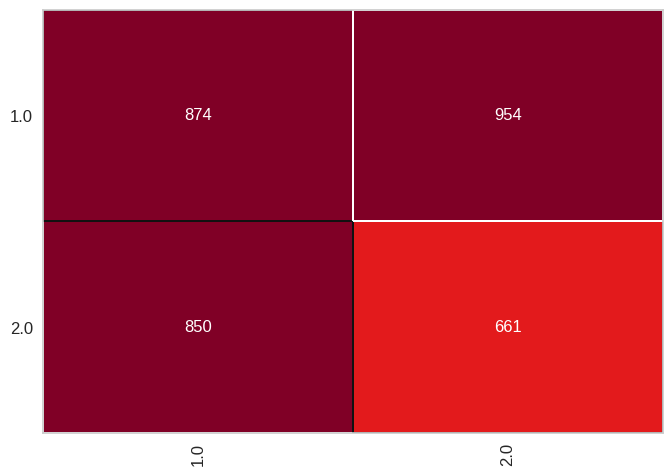

In [ ]:
cm = ConfusionMatrix(model)
cm.fit(X_train_balanced, y_train_balanced)
cm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.21      0.80      0.34       661
         2.0       0.82      0.23      0.36      2544

    accuracy                           0.35      3205
   macro avg       0.52      0.52      0.35      3205
weighted avg       0.70      0.35      0.36      3205



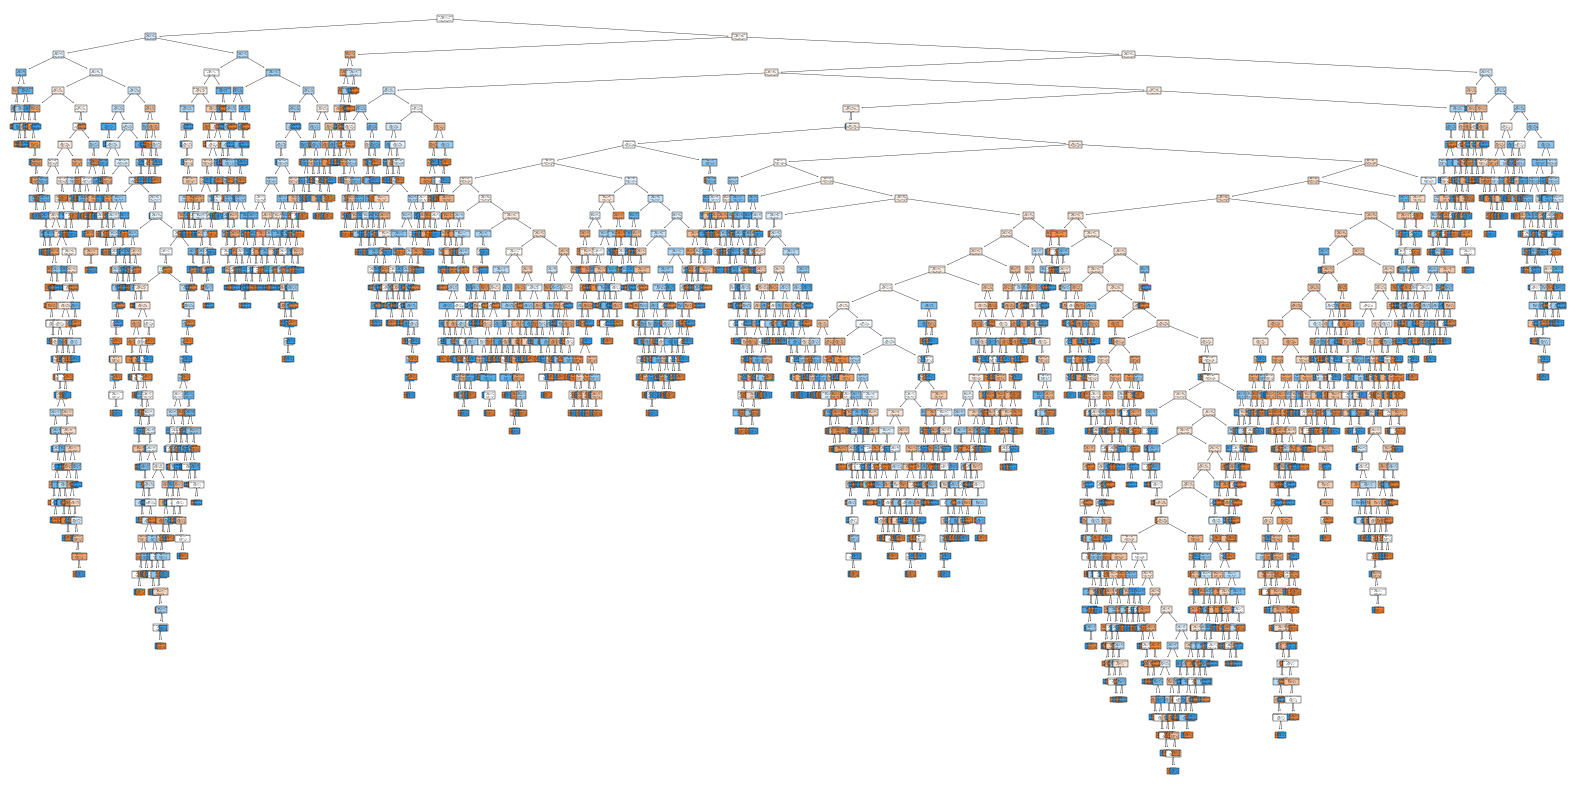

In [ ]:
column_names = iss.columns.tolist()
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=column_names, class_names=True, filled=True)
plt.show()